In [1]:
import os
os.chdir("./SKIDL/temp")

from skidl import *

for key in lib_search_paths:
    lib_search_paths[key] = [path if path != '.' else f'../{key}' for path in lib_search_paths[key]]
print(lib_search_paths)

# Load the package for drawing graphs.
import matplotlib.pyplot as plt
# Omit the following line if you're not using a Jupyter notebook.
%matplotlib inline

# Load the SKiDL + PySpice packages and initialize them for doing circuit simulations.
from skidl.pyspice import *

{'skidl': ['../skidl', '/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/skidl/tools/skidl/libs'], 'kicad5': ['../kicad5'], 'spice': ['../spice'], 'kicad7': ['../kicad7'], 'kicad8': ['../kicad8'], 'kicad6': ['../kicad6']}


ERROR: No footprint for V/VS. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1740720533.py:10]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1740720533.py:10]


INFO: 0 warnings found while generating netlist.


INFO: 2 errors found while generating netlist.



ERROR: No footprint for V/VS. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1740720533.py:10]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1740720533.py:10]


   V    I (mA)
  0.00  -0.00
  0.10   0.10
  0.20   0.20
  0.30   0.30
  0.40   0.40
  0.50   0.50
  0.60   0.60
  0.70   0.70
  0.80   0.80
  0.90   0.90
  1.00   1.00


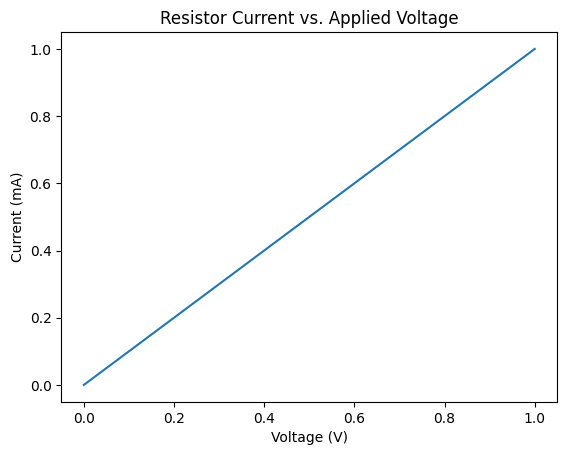

In [2]:
reset()  # This will clear any previously defined circuitry.

# Create and interconnect the components.
vs = V(ref='VS', dc_value = 1 @ u_V)  # Create a voltage source named "VS" with an initial value of 1 volt.
r1 = R(value = 1 @ u_kOhm)            # Create a 1 Kohm resistor.
vs['p'] += r1[1]       # Connect one end of the resistor to the positive terminal of the voltage source.
gnd += vs['n'], r1[2]  # Connect the other end of the resistor and the negative terminal of the source to ground.

# Simulate the circuit.
circ = generate_netlist()              # Translate the SKiDL code into a PyCircuit Circuit object.
sim = circ.simulator()                 # Create a simulator for the Circuit object.
dc_vals = sim.dc(VS=slice(0, 1, 0.1))  # Run a DC simulation where the voltage ramps from 0 to 1V by 0.1V increments.

# Get the voltage applied to the resistor and the current coming out of the voltage source.
voltage = dc_vals[node(vs['p'])]       # Get the voltage applied by the positive terminal of the source.
current = -dc_vals['VS']               # Get the current coming out of the positive terminal of the voltage source.

# Print a table showing the current through the resistor for the various applied voltages.
print('{:^7s}{:^7s}'.format('V', ' I (mA)'))
print('='*15)
for v, i in zip(voltage.as_ndarray(), current.as_ndarray()*1000):
   print('{:6.2f} {:6.2f}'.format(v, i))

# Create a plot of the current (Y coord) versus the applied voltage (X coord).
figure = plt.figure(1)
plt.title('Resistor Current vs. Applied Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.plot(voltage, current*1000) # Plot X=voltage and Y=current (in milliamps, so multiply it by 1000).
plt.show()

ERROR: No footprint for PULSEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


ERROR: No footprint for C/C1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


INFO: 0 warnings found while generating netlist.


INFO: 3 errors found while generating netlist.



ERROR: No footprint for PULSEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


ERROR: No footprint for C/C1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/4074105237.py:11]


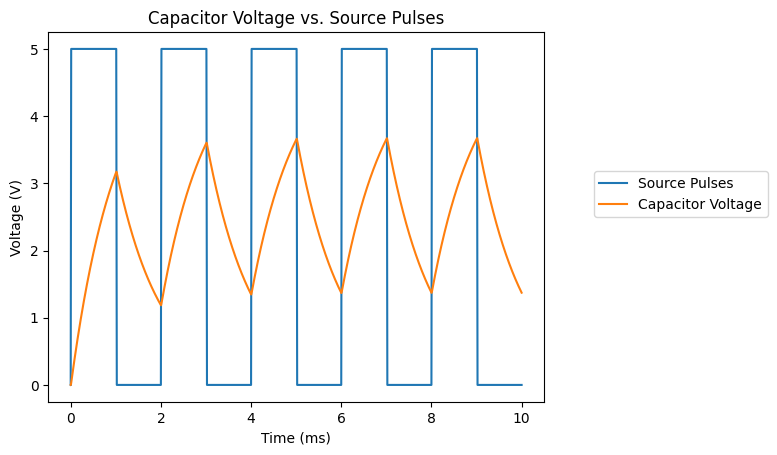

In [3]:
reset()  # Clear out the existing circuitry from the previous example.

# Create a pulsed voltage source, a resistor, and a capacitor.
vs = PULSEV(initial_value=0, pulsed_value=5@u_V, pulse_width=1@u_ms, period=2@u_ms)  # 1ms ON, 1ms OFF pulses.
r = R(value=1@u_kOhm)    # 1 Kohm resistor.
c = C(value=1@u_uF)      # 1 uF capacitor.
r['+', '-'] += vs['p'], c['+']  # Connect the resistor between the positive source terminal and one of the capacitor terminals.
gnd += vs['n'], c['-']   # Connect the negative battery terminal and the other capacitor terminal to ground.

# Simulate the circuit.
circ = generate_netlist()            # Create the PySpice Circuit object from the SKiDL code.
sim = circ.simulator()               # Get a simulator for the Circuit object.
waveforms = sim.transient(step_time=0.01@u_ms, end_time=10@u_ms)  # Run a transient simulation from 0 to 10 msec.

# Get the simulation data.
time = waveforms.time                  # Time values for each point on the waveforms.
pulses = waveforms[node(vs['p'])]      # Voltage on the positive terminal of the pulsed voltage source.
cap_voltage = waveforms[node(c['+'])]  # Voltage on the capacitor.

# Plot the pulsed source and capacitor voltage values versus time.
figure = plt.figure(1)
plt.title('Capacitor Voltage vs. Source Pulses')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time*1000, pulses)       # Plot pulsed source waveform.
plt.plot(time*1000, cap_voltage)  # Plot capacitor charging waveform.
plt.legend(('Source Pulses', 'Capacitor Voltage'), loc=(1.1, 0.5))
plt.show()

ERROR: No footprint for SINEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for E/E1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


INFO: 0 warnings found while generating netlist.


INFO: 4 errors found while generating netlist.



ERROR: No footprint for SINEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for E/E1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/2100732967.py:15]


.title 
V1 N_1 0 DC 0V AC 1V SIN(0V 1V 100Hz 0s 0Hz)
E1 N_2 0 N_1 0 2.5
R1 N_2 0 1kOhm
R2 N_1 0 1kOhm



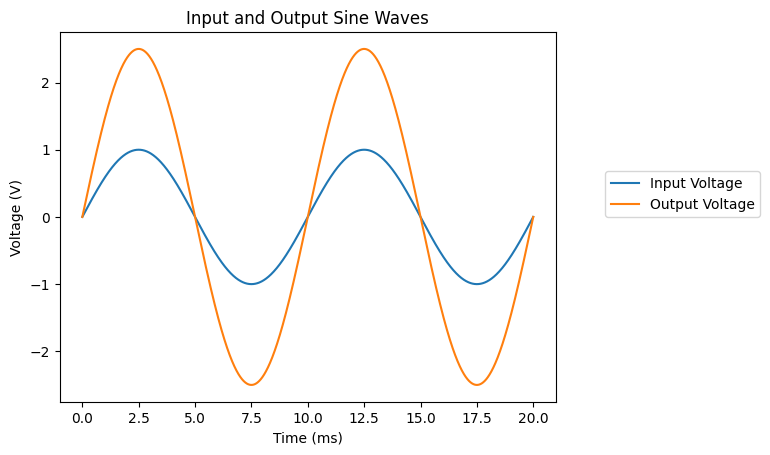

In [4]:
reset()  # Clear out the existing circuitry from the previous example.

# Connect a sine wave to the control input of a voltage-controlled voltage source.
vs = SINEV(amplitude=1@u_V, frequency=100@u_Hz)  # 1V sine wave source at 100 Hz.
vs['n'] += gnd  # Connect the negative terminal of the sine wave to ground.
vc = VCVS(gain=2.5)  # Voltage-controlled voltage source with a gain of 2.5.
vc['ip', 'in'] += vs['p'], gnd  # Connect the sine wave to the input port of the controlled source.
vc['op', 'on'] += Net(), gnd    # Connect the output port of the controlled source to a net and ground.
rl = R(value=1@u_kOhm)
rl[1,2] += vc['op'], gnd
r = R(value=1@u_kOhm)
r[1,2] += vs['p'], gnd

# Simulate the circuit.
circ = generate_netlist()  # Create the PySpice Circuit object from the SKiDL code.
print(circ)
sim = circ.simulator()  # Get a simulator for the Circuit object.
waveforms = sim.transient(step_time=0.01@u_ms, end_time=20@u_ms) # Run a transient simulation from 0 to 20 msec.

# Get the time-varying waveforms of the sine wave source and the voltage-controlled source.
time = waveforms.time
vin = waveforms[node(vs['p'])]
vout = waveforms[node(vc['op'])]

# Plot the input and output waveforms. Note that the output voltage is 2.5x the input voltage.
figure = plt.figure(1)
plt.title('Input and Output Sine Waves')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time*1000, vin)
plt.plot(time*1000, vout)
plt.legend(('Input Voltage', 'Output Voltage'), loc=(1.1, 0.5))
plt.show()

ERROR: No footprint for SINEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for L/L1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for L/L2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for K/K1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


INFO: 0 warnings found while generating netlist.


INFO: 6 errors found while generating netlist.



ERROR: No footprint for SINEV/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for L/L1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for L/L2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


ERROR: No footprint for K/K1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/1446144757.py:25]


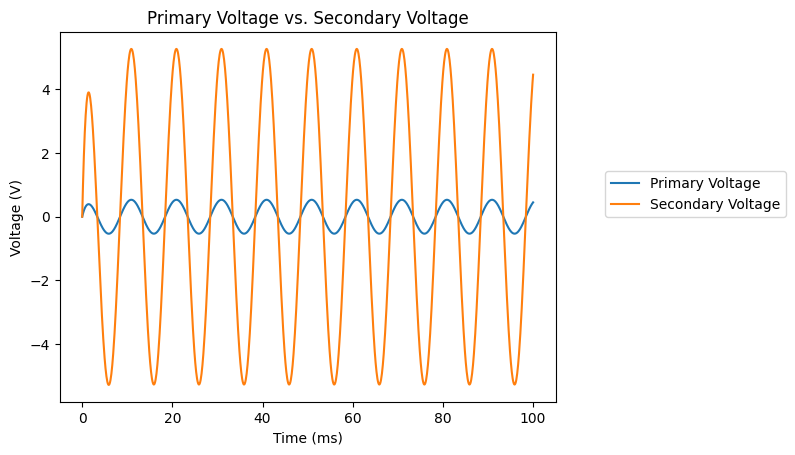

In [5]:
reset()  # Clear out existing circuitry from previous example.

turns_ratio = 10  # Voltage gain from primary to secondary.
primary_inductance = 1 @ u_uH
secondary_inductance = primary_inductance * turns_ratio**2

# Create a transformer from two coupled inductors.
vs = SINEV(amplitude=1@u_V, frequency=100@u_Hz)  # AC input voltage.
rs = R(value=0 @ u_Ohm)                    # Source resistor.
primary   = L(value=primary_inductance)    # Inductor for transformer primary.
secondary = L(value=secondary_inductance)  # Inductor for transformer secondary.
rload = R(value=100 @ u_Ohm)               # Load resistor.

# This is the coupler between the inductors that transfers the
# voltage from the primary to the secondary.
coupler_prim_sec = K(ind1=primary, ind2=secondary, coupling=0.99)

# Connect the voltage source to the primary through the source resistor.
gnd & vs['n,p'] & rs & primary[1,2] & gnd

# Connect the secondary to the load resistor.
gnd & secondary[2,1] & rload & gnd

# Simulate the transformer.
sim=generate_netlist().simulator()
waveforms = sim.transient(step_time=0.1 @ u_ms, end_time=100@u_ms)

# Get the waveforms from the primary and secondary.
time = waveforms.time * 10**3
v_pri = waveforms[node(primary[1])]    # Input voltage at the transformer primary.
v_sec = waveforms[node(secondary[1])]  # Output voltage at transformer secondary.

# Plot the input and output waveforms.
figure = plt.figure(1)
plt.title('Primary Voltage vs. Secondary Voltage')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time, v_pri)
plt.plot(time, v_sec)
plt.legend(('Primary Voltage', 'Secondary Voltage'), loc=(1.1, 0.5))
plt.show()

ERROR: No footprint for Q/Q1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for V/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R3. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for SINEV/V2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


INFO: 0 warnings found while generating netlist.


INFO: 6 errors found while generating netlist.



ERROR: No footprint for Q/Q1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for V/V1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R1. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for R/R3. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


ERROR: No footprint for SINEV/V2. @ [/home/icuser/anaconda3/envs/icleadindoc2024/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577=>/tmp/ipykernel_12447/3371810580.py:19]


.title 
.include /home/icuser/ICLeadIn2024Doc/SKIDL/spice/2N2222A.lib
Q1 N_1 N_2 0 2n2222a
V1 N_3 0 5V
R1 N_4 N_2 5kOhm
R2 N_2 N_3 25kOhm
R3 N_1 N_3 1kOhm
V2 N_4 0 DC 0V AC 1V SIN(0V 0.01V 1kHz 0s 0Hz)



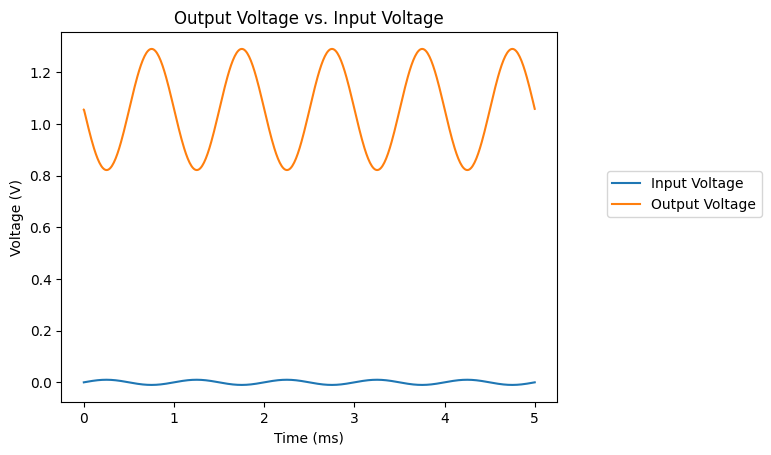

In [6]:
reset()  # Clear out the existing circuitry from the previous example.

# Create a transistor, power supply, bias resistors, collector resistor, and an input sine wave source.
q = BJT(model='2n2222a')    # 2N2222A NPN transistor. The model is stored in a directory of SPICE .lib files.
# q = BJT(model=XspiceModel('qmod', 'npn', level=2))

vdc = V(dc_value=5@u_V)     # 5V power supply.
rs = R(value=5@u_kOhm)      # Source resistor in series with sine wave input voltage.
rb = R(value=25@u_kOhm)     # Bias resistor from 5V to base of transistor.
rc = R(value=1@u_kOhm)      # Load resistor connected to collector of transistor.
vs = SINEV(amplitude=0.01@u_V, frequency=1@u_kHz)  # 1 KHz sine wave input source.
q['c', 'b', 'e'] += rc[1], rb[1], gnd  # Connect transistor CBE pins to load & bias resistors and ground.
vdc['p'] += rc[2], rb[2]    # Connect other end of load and bias resistors to power supply's positive terminal.
vdc['n'] += gnd             # Connect negative terminal of power supply to ground.
rs[1,2] += vs['p'], q['b']  # Connect source resistor from input source to base of transistor.
vs['n'] += gnd              # Connect negative terminal of input source to ground.

# Simulate the transistor amplifier. This requires a SPICE library containing a model of the 2N2222A transistor.
circ = generate_netlist()  # Pass the directory to the SPICE model library when creating circuit.
print(circ)
sim = circ.simulator()
waveforms = sim.transient(step_time=0.01@u_ms, end_time=5@u_ms)

# Get the input source and amplified output waveforms.
time = waveforms.time
vin = waveforms[node(vs['p'])]  # Input source voltage.
vout = waveforms[node(q['c'])]  # Amplified output voltage at collector of the transistor.

# Plot the input and output waveforms.
figure = plt.figure(1)
plt.title('Output Voltage vs. Input Voltage')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.plot(time*1000, vin)
plt.plot(time*1000, vout)
plt.legend(('Input Voltage', 'Output Voltage'), loc=(1.1, 0.5))
plt.show()